In [19]:
import glob
import keras as k  #machine learning library
from keras.models import  Sequential, load_model  #model- Sequential
from keras.layers import Dense   #neural network dense layer(Each neuron recieves input from all the neurons in the previous layer)
import numpy as np  #num py pythton library use for numerical works
import pandas as pd  #pandas library use data manipulation and analysis
from sklearn.model_selection import train_test_split   #machine learining library
from sklearn.preprocessing import LabelEncoder,MinMaxScaler  #for lableEncoder use for converting strig in to number
import matplotlib.pyplot as plt  #use for plot our data
import os
import flask

In [3]:
pwd

'C:\\Users\\Kushan\\Documents'

In [4]:
df=pd.read_csv(r'D:\Software Engineering project\machine learning data sets/kidney_disease_improve.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,0,0,0,121,...,44,7800,5.2,1,1.0,0,1,0,0,1
1,7,50,1.020,4,0,0,0,0,0,175,...,38,6000,3.9,0,0.0,0,1,0,0,1
2,62,80,1.010,2,3,1,0,0,0,423,...,31,7500,3.9,0,1.0,0,0,0,1,1
3,48,70,1.005,4,0,1,1,1,0,117,...,32,6700,3.9,1,0.0,0,0,1,1,1
4,51,80,1.010,2,0,1,0,0,0,106,...,35,7300,4.6,0,0.0,0,1,0,0,1


In [5]:
#get shape of data
df.shape


(400, 25)

In [6]:
#create list of columns for informations
columns_to_retain=['al','hemo','pcc','rbcc','age','bp','bu','sod','pot','appet','dm','bgr','classification']  #select columns
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)  # filter selected columns
df = df.dropna(axis=0) # drop missing values or N/A data row

In [7]:
for column in df.columns:
  if df[column].dtype ==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

In [8]:
df.head()

,age,bp,al,pcc,bgr,bu,sod,pot,hemo,rbcc,dm,appet,classification
0,40,3,1,0,48,36.0,134.0,4.9,15.4,5.2,1.0,1,1
1,5,0,4,0,84,18.0,134.0,4.9,11.3,3.9,0.0,1,1
2,54,3,2,0,141,53.0,134.0,4.9,9.6,3.9,1.0,0,1
3,40,2,4,1,44,56.0,111.0,2.5,11.2,3.9,0.0,0,1
4,43,3,2,0,33,26.0,134.0,4.9,11.6,4.6,0.0,1,1


In [9]:
#difining X(feature set) and Y(result set)
X=df.drop(['classification'],axis=1)
Y=df['classification']

In [10]:
#Feature scalling using mon-max, after scalling all features lie between 1 and 0
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_name=X.columns
X[column_name]=x_scaler.transform(X)

In [11]:
# dvide train set and test sets( shuffle for better train set)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True);

In [12]:
#build model(using sequential method)  1 input layer(13 neurons) / 1 hiddn layer(256 neurons) / 1 out put layer(onr neuron)
model=Sequential()
model.add(Dense(256, activation='relu',kernel_initializer=k.initializers.random_normal(seed=13),input_dim=len(X.columns)))
model.add(Dense(1,activation='hard_sigmoid'))

In [13]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [14]:
#train data epochs=200
history=model.fit(X_train,Y_train, epochs=500, batch_size=X_train.shape[0])

Epoch 1/500
319/319 [==============================] - 1s 3ms/step - loss: 0.7109 - accuracy: 0.3636
Epoch 2/500
319/319 [==============================] - 0s 25us/step - loss: 0.6996 - accuracy: 0.3824
Epoch 3/500
319/319 [==============================] - 0s 13us/step - loss: 0.6888 - accuracy: 0.6834
Epoch 4/500
319/319 [==============================] - 0s 25us/step - loss: 0.6785 - accuracy: 0.6897
Epoch 5/500
319/319 [==============================] - 0s 13us/step - loss: 0.6692 - accuracy: 0.6364
Epoch 6/500
319/319 [==============================] - 0s 25us/step - loss: 0.6597 - accuracy: 0.6364
Epoch 7/500
319/319 [==============================] - 0s 25us/step - loss: 0.6507 - accuracy: 0.6364
Epoch 8/500
319/319 [==============================] - 0s 25us/step - loss: 0.6417 - accuracy: 0.6364
Epoch 9/500
319/319 [==============================] - 0s 13us/step - loss: 0.6330 - accuracy: 0.6364
Epoch 10/500
319/319 [==============================] - 0s 25us/step - loss: 0.6245

Epoch 81/500
319/319 [==============================] - 0s 13us/step - loss: 0.1870 - accuracy: 0.9530
Epoch 82/500
319/319 [==============================] - 0s 13us/step - loss: 0.1838 - accuracy: 0.9530
Epoch 83/500
319/319 [==============================] - 0s 25us/step - loss: 0.1807 - accuracy: 0.9530
Epoch 84/500
319/319 [==============================] - 0s 13us/step - loss: 0.1776 - accuracy: 0.9530
Epoch 85/500
319/319 [==============================] - 0s 25us/step - loss: 0.1746 - accuracy: 0.9530
Epoch 86/500
319/319 [==============================] - 0s 25us/step - loss: 0.1716 - accuracy: 0.9561
Epoch 87/500
319/319 [==============================] - 0s 13us/step - loss: 0.1687 - accuracy: 0.9561
Epoch 88/500
319/319 [==============================] - 0s 13us/step - loss: 0.1658 - accuracy: 0.9561
Epoch 89/500
319/319 [==============================] - 0s 13us/step - loss: 0.1631 - accuracy: 0.9561
Epoch 90/500
319/319 [==============================] - 0s 13us/step - lo

Epoch 160/500
319/319 [==============================] - 0s 25us/step - loss: 0.0808 - accuracy: 0.9812
Epoch 161/500
319/319 [==============================] - 0s 13us/step - loss: 0.0803 - accuracy: 0.9812
Epoch 162/500
319/319 [==============================] - 0s 25us/step - loss: 0.0799 - accuracy: 0.9812
Epoch 163/500
319/319 [==============================] - 0s 25us/step - loss: 0.0794 - accuracy: 0.9812
Epoch 164/500
319/319 [==============================] - 0s 13us/step - loss: 0.0790 - accuracy: 0.9812
Epoch 165/500
319/319 [==============================] - 0s 25us/step - loss: 0.0785 - accuracy: 0.9812
Epoch 166/500
319/319 [==============================] - 0s 13us/step - loss: 0.0781 - accuracy: 0.9812
Epoch 167/500
319/319 [==============================] - 0s 13us/step - loss: 0.0777 - accuracy: 0.9812
Epoch 168/500
319/319 [==============================] - 0s 13us/step - loss: 0.0773 - accuracy: 0.9812
Epoch 169/500
319/319 [==============================] - 0s 13us

Epoch 239/500
319/319 [==============================] - 0s 13us/step - loss: 0.0577 - accuracy: 0.9843
Epoch 240/500
319/319 [==============================] - 0s 13us/step - loss: 0.0576 - accuracy: 0.9843
Epoch 241/500
319/319 [==============================] - 0s 25us/step - loss: 0.0574 - accuracy: 0.9843
Epoch 242/500
319/319 [==============================] - 0s 13us/step - loss: 0.0572 - accuracy: 0.9843
Epoch 243/500
319/319 [==============================] - 0s 13us/step - loss: 0.0570 - accuracy: 0.9843
Epoch 244/500
319/319 [==============================] - 0s 25us/step - loss: 0.0569 - accuracy: 0.9843
Epoch 245/500
319/319 [==============================] - 0s 13us/step - loss: 0.0567 - accuracy: 0.9843
Epoch 246/500
319/319 [==============================] - 0s 13us/step - loss: 0.0566 - accuracy: 0.9843
Epoch 247/500
319/319 [==============================] - 0s 25us/step - loss: 0.0564 - accuracy: 0.9843
Epoch 248/500
319/319 [==============================] - 0s 25us

Epoch 318/500
319/319 [==============================] - 0s 25us/step - loss: 0.0480 - accuracy: 0.9843
Epoch 319/500
319/319 [==============================] - 0s 25us/step - loss: 0.0479 - accuracy: 0.9843
Epoch 320/500
319/319 [==============================] - 0s 13us/step - loss: 0.0478 - accuracy: 0.9843
Epoch 321/500
319/319 [==============================] - 0s 25us/step - loss: 0.0477 - accuracy: 0.9843
Epoch 322/500
319/319 [==============================] - 0s 13us/step - loss: 0.0476 - accuracy: 0.9843
Epoch 323/500
319/319 [==============================] - 0s 13us/step - loss: 0.0475 - accuracy: 0.9843
Epoch 324/500
319/319 [==============================] - 0s 25us/step - loss: 0.0474 - accuracy: 0.9843
Epoch 325/500
319/319 [==============================] - 0s 25us/step - loss: 0.0473 - accuracy: 0.9843
Epoch 326/500
319/319 [==============================] - 0s 13us/step - loss: 0.0473 - accuracy: 0.9843
Epoch 327/500
319/319 [==============================] - 0s 25us

Epoch 397/500
319/319 [==============================] - 0s 25us/step - loss: 0.0419 - accuracy: 0.9875
Epoch 398/500
319/319 [==============================] - 0s 13us/step - loss: 0.0419 - accuracy: 0.9875
Epoch 399/500
319/319 [==============================] - 0s 13us/step - loss: 0.0418 - accuracy: 0.9875
Epoch 400/500
319/319 [==============================] - 0s 13us/step - loss: 0.0417 - accuracy: 0.9875
Epoch 401/500
319/319 [==============================] - 0s 25us/step - loss: 0.0417 - accuracy: 0.9875
Epoch 402/500
319/319 [==============================] - 0s 13us/step - loss: 0.0416 - accuracy: 0.9875
Epoch 403/500
319/319 [==============================] - 0s 25us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 404/500
319/319 [==============================] - 0s 13us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 405/500
319/319 [==============================] - 0s 18us/step - loss: 0.0414 - accuracy: 0.9875
Epoch 406/500
319/319 [==============================] - 0s 25us

Epoch 476/500
319/319 [==============================] - 0s 13us/step - loss: 0.0380 - accuracy: 0.9906
Epoch 477/500
319/319 [==============================] - 0s 13us/step - loss: 0.0379 - accuracy: 0.9906
Epoch 478/500
319/319 [==============================] - 0s 17us/step - loss: 0.0379 - accuracy: 0.9906
Epoch 479/500
319/319 [==============================] - 0s 13us/step - loss: 0.0379 - accuracy: 0.9906
Epoch 480/500
319/319 [==============================] - 0s 25us/step - loss: 0.0378 - accuracy: 0.9906
Epoch 481/500
319/319 [==============================] - 0s 13us/step - loss: 0.0378 - accuracy: 0.9906
Epoch 482/500
319/319 [==============================] - 0s 25us/step - loss: 0.0377 - accuracy: 0.9906
Epoch 483/500
319/319 [==============================] - 0s 25us/step - loss: 0.0377 - accuracy: 0.9906
Epoch 484/500
319/319 [==============================] - 0s 13us/step - loss: 0.0377 - accuracy: 0.9906
Epoch 485/500
319/319 [==============================] - 0s 13us

In [15]:
model.save('ckd.model')

Text(0.5, 0, 'epoch')

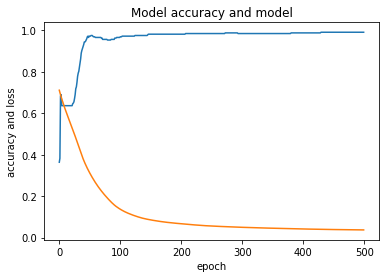

In [16]:
#visualize model and loss accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and model')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [18]:
type(X_test)

pandas.core.frame.DataFrame

In [105]:
print('shape of training data: ',X_train.shape)
print('shape of test data: ',X_test.shape)

shape of training data:  (319, 12)
shape of test data:  (80, 12)


In [106]:
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
pred

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1]

In [107]:
print('Original: {0}'.format(','.join(str(x) for x in Y_test)))
print('Predict: {0}'.format(','.join(str(x) for x in pred)))

Original: 0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1
Predict: 0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,1
